In [ ]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# EDA and Data Preparation
#To read csv File from locally stored file
df = pd.read_csv(r'C:\Users\DELL\Downloads\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:

df.shape

(284807, 31)

In [5]:
# Lets check the numeric distribution of the data:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#Examining the data frame for the shape, datatypes, NUlls etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Check the fraud/Non_Fraud related records
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:

#find % values of class
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [9]:

#find % values of class
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [10]:
#observe the different feature type present in the data
#lets check data types of the features
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [11]:
# correlation matrix
cor = df.corr()
cor

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,...,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
V2,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,...,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
V3,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,...,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
V4,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,...,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447
V5,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,...,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974
V6,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,...,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643
V7,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,...,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257
V8,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,...,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875
V9,-0.008660,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,...,3.040326e-12,-7.467526e-13,-1.011003e-12,8.579072e-13,-1.590341e-12,-7.723547e-13,2.428930e-12,-1.406856e-12,-0.044246,-0.097733


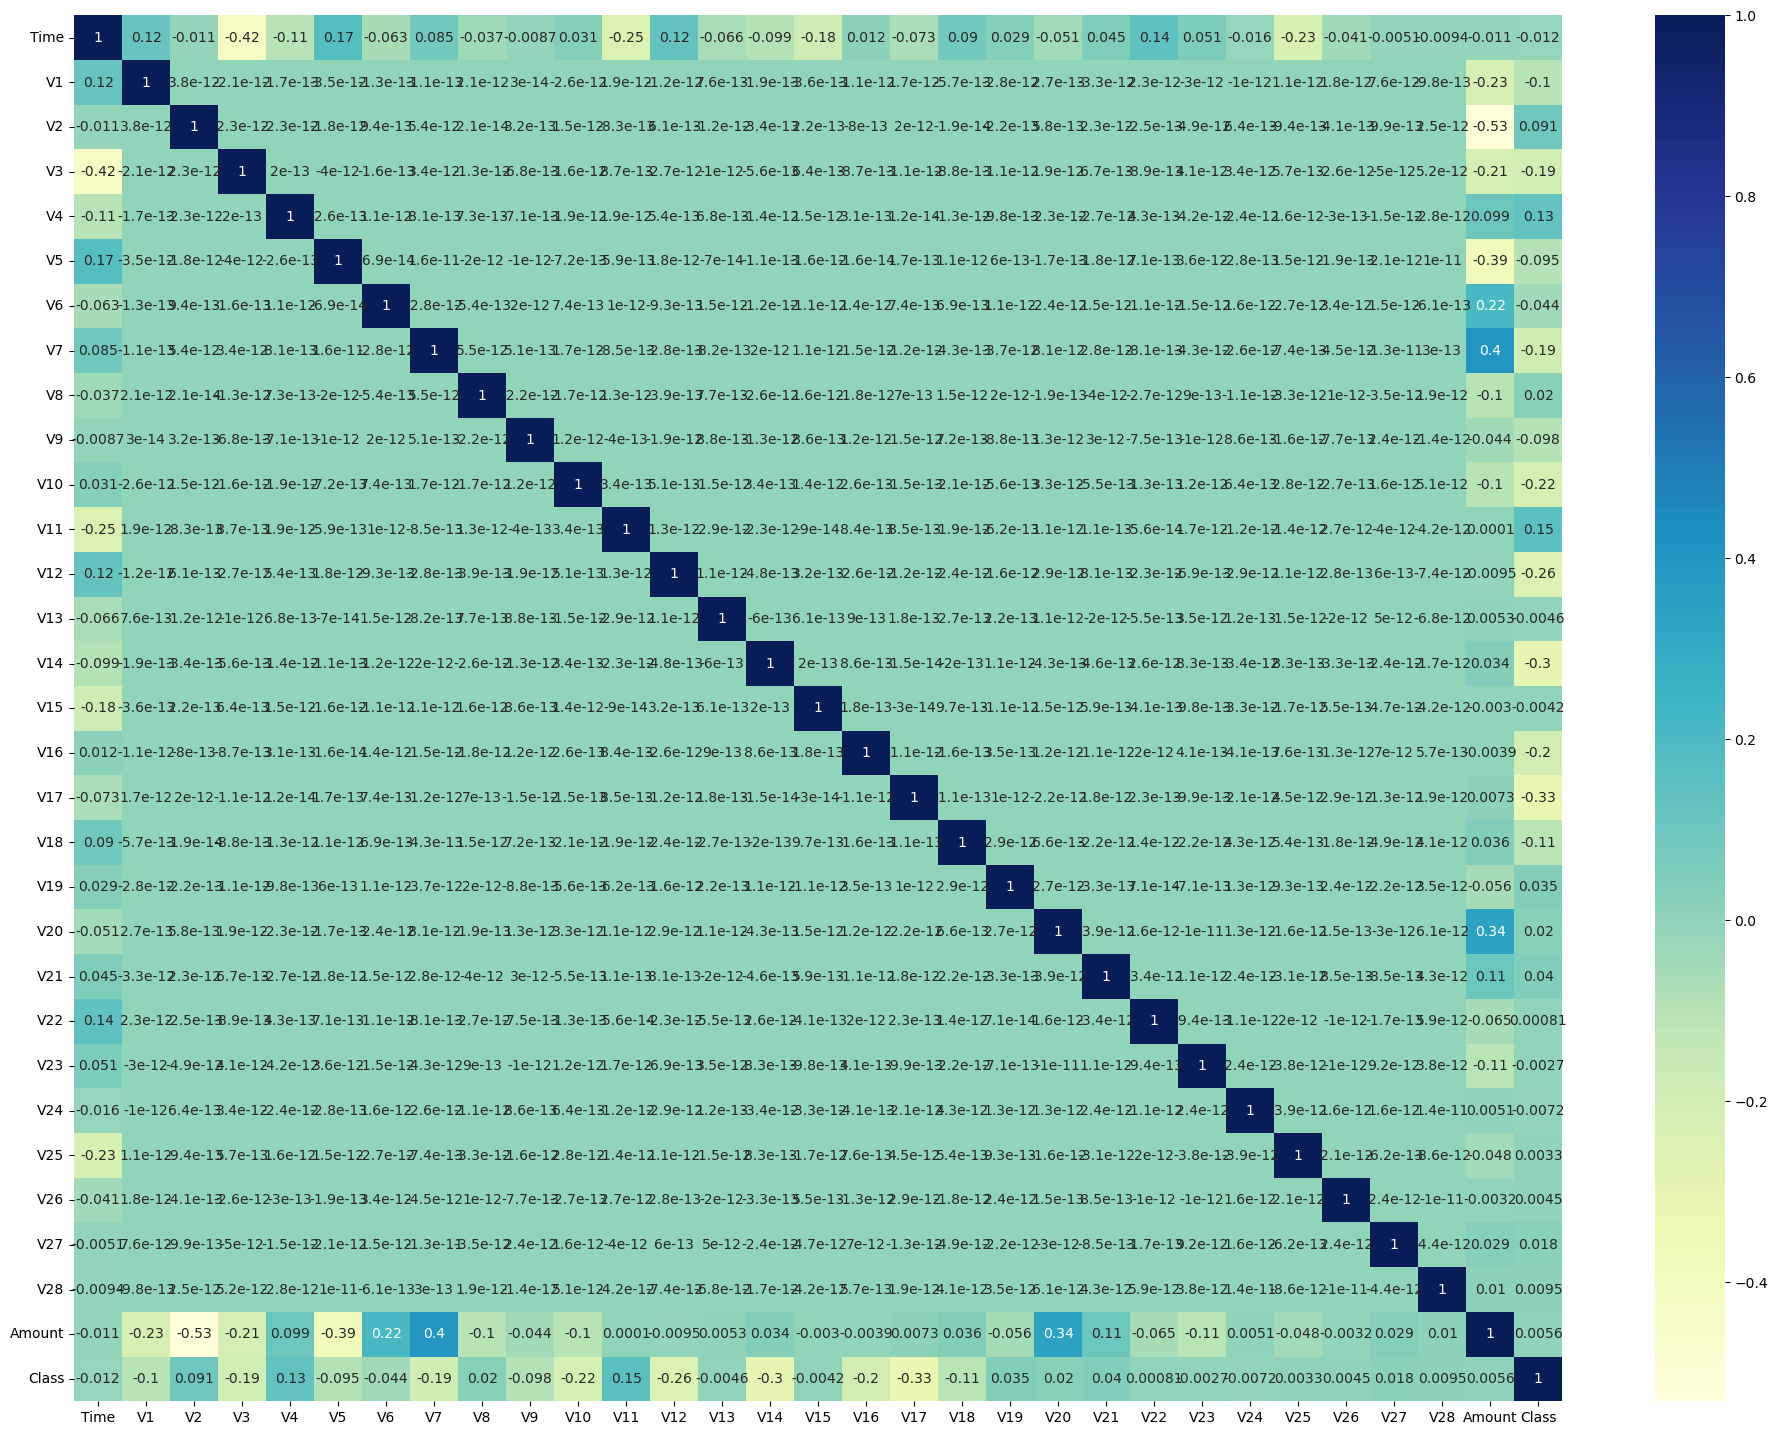

In [12]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [13]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

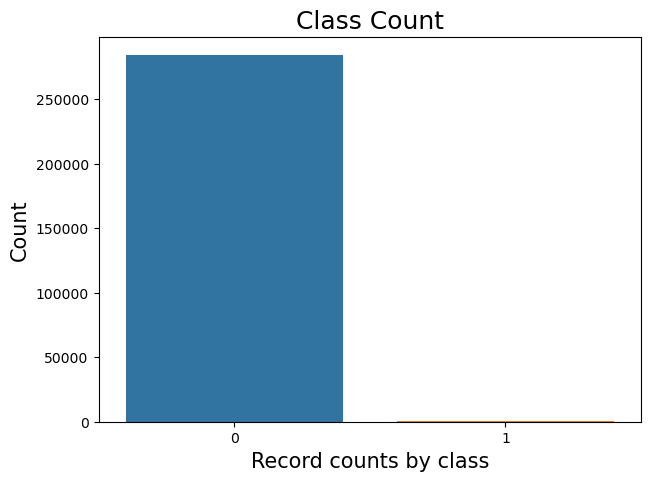

In [14]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

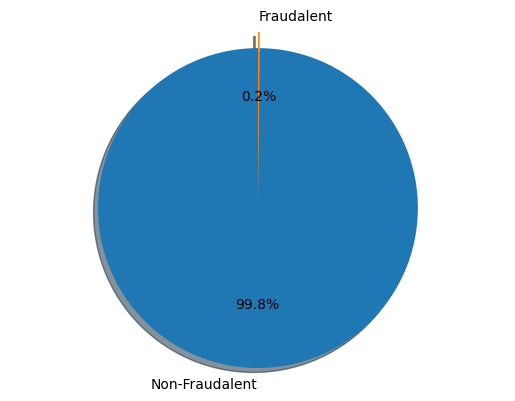

In [15]:
#plt.title('Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages')
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [16]:
# Create a scatter plot to observe the distribution of classes with time
#As time is given in relative fashion, we will need to use pandas.Timedelta which Represents a duration, the difference between two dates or times.

Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

Text(0.5, 1.05, 'Time vs Class Distribution')

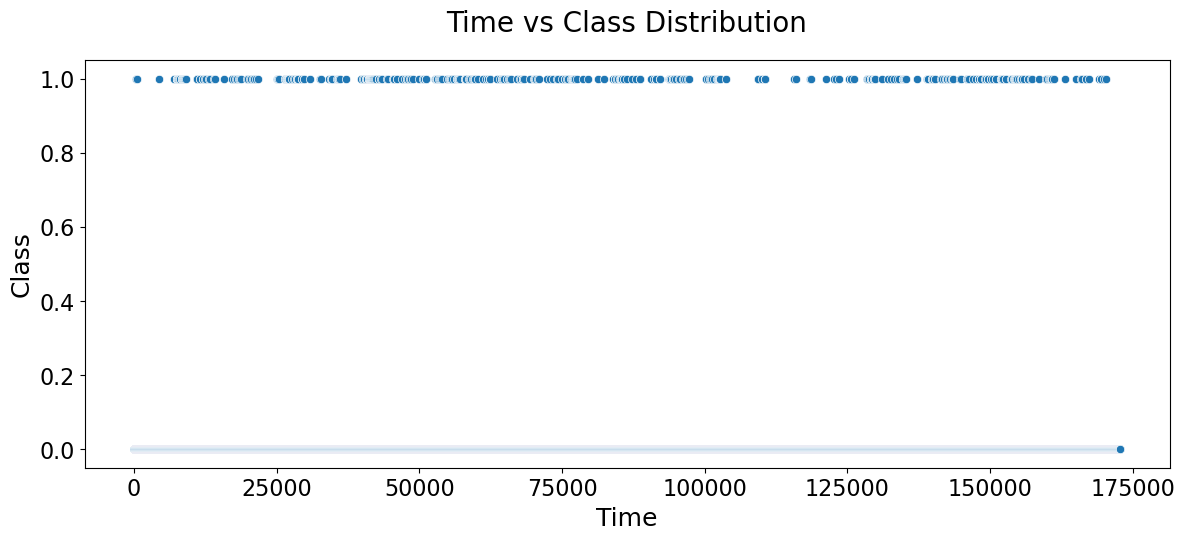

In [17]:
# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with time

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)

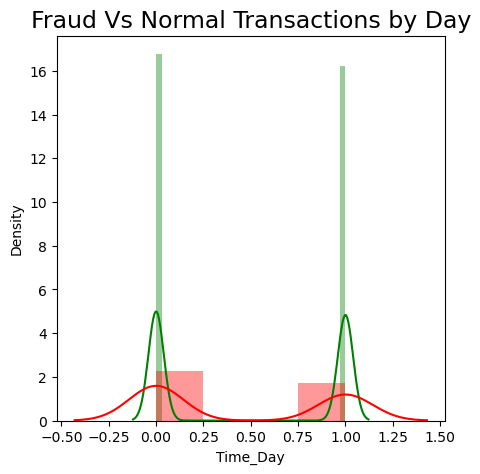

In [18]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

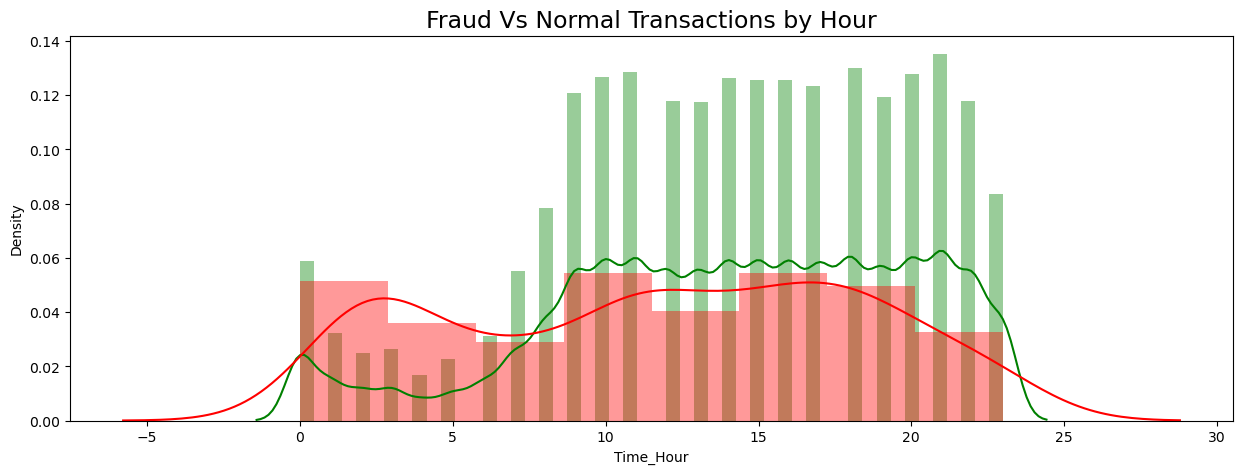

In [19]:
#The fraus Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

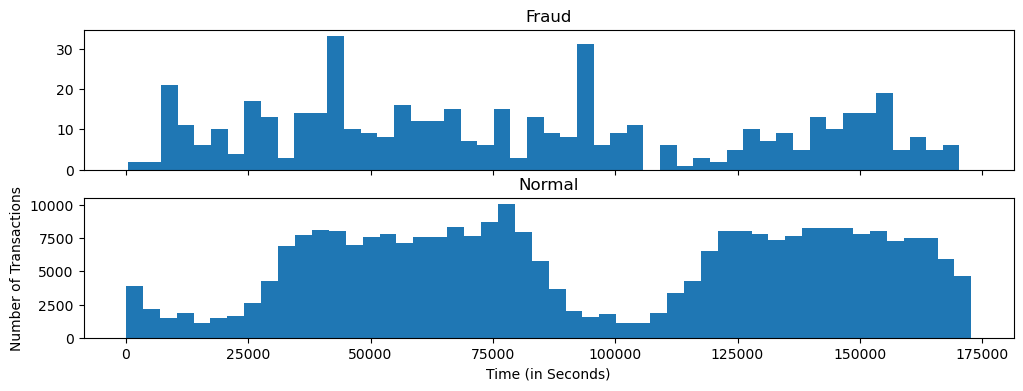

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [21]:
# Create a scatter plot to observe the distribution of classes with Amount
#To clearly the data of frauds and no frauds
df_Fraud = df[df['Class'] == 1]
df_Regular = df[df['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [22]:
#Regular Transaction Amount Statistics
print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

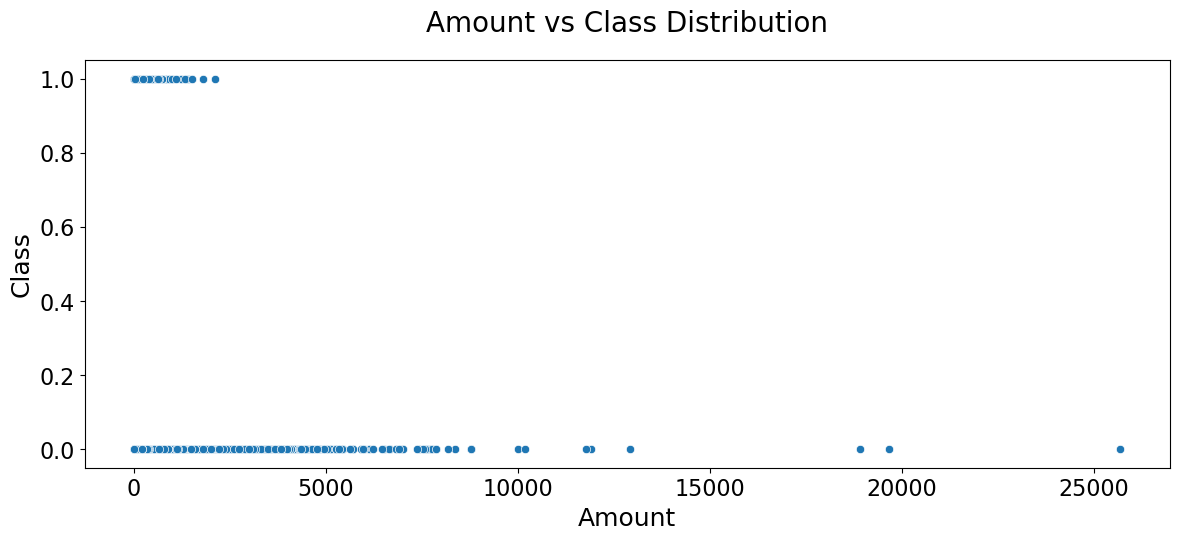

In [23]:
# Create a scatter plot to observe the distribution of classes with Amount

# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with Amount


fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)

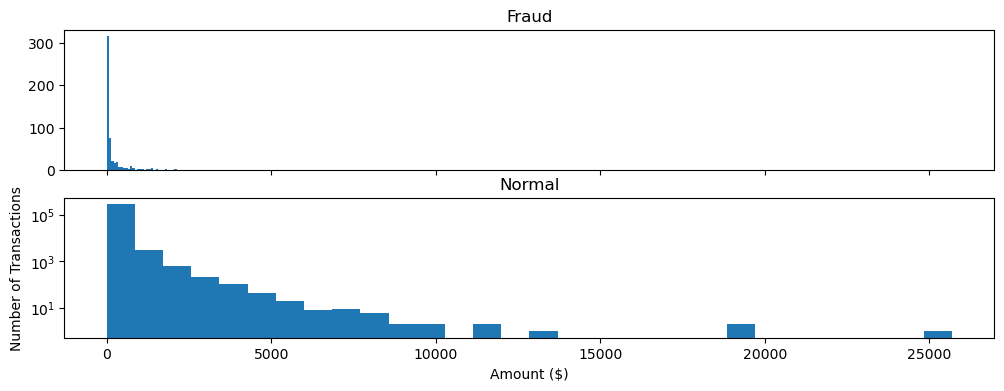

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [25]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


,Correlation
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413


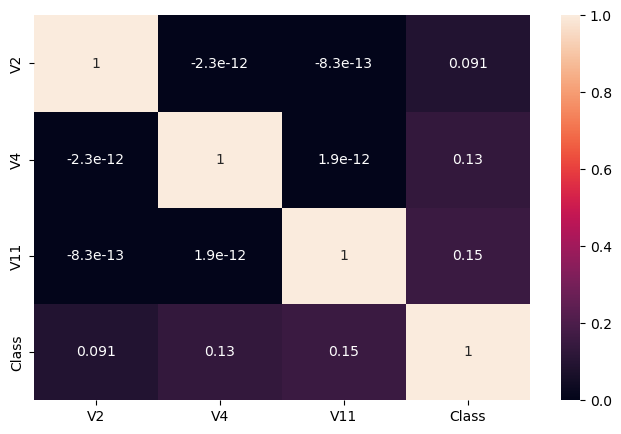

In [26]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

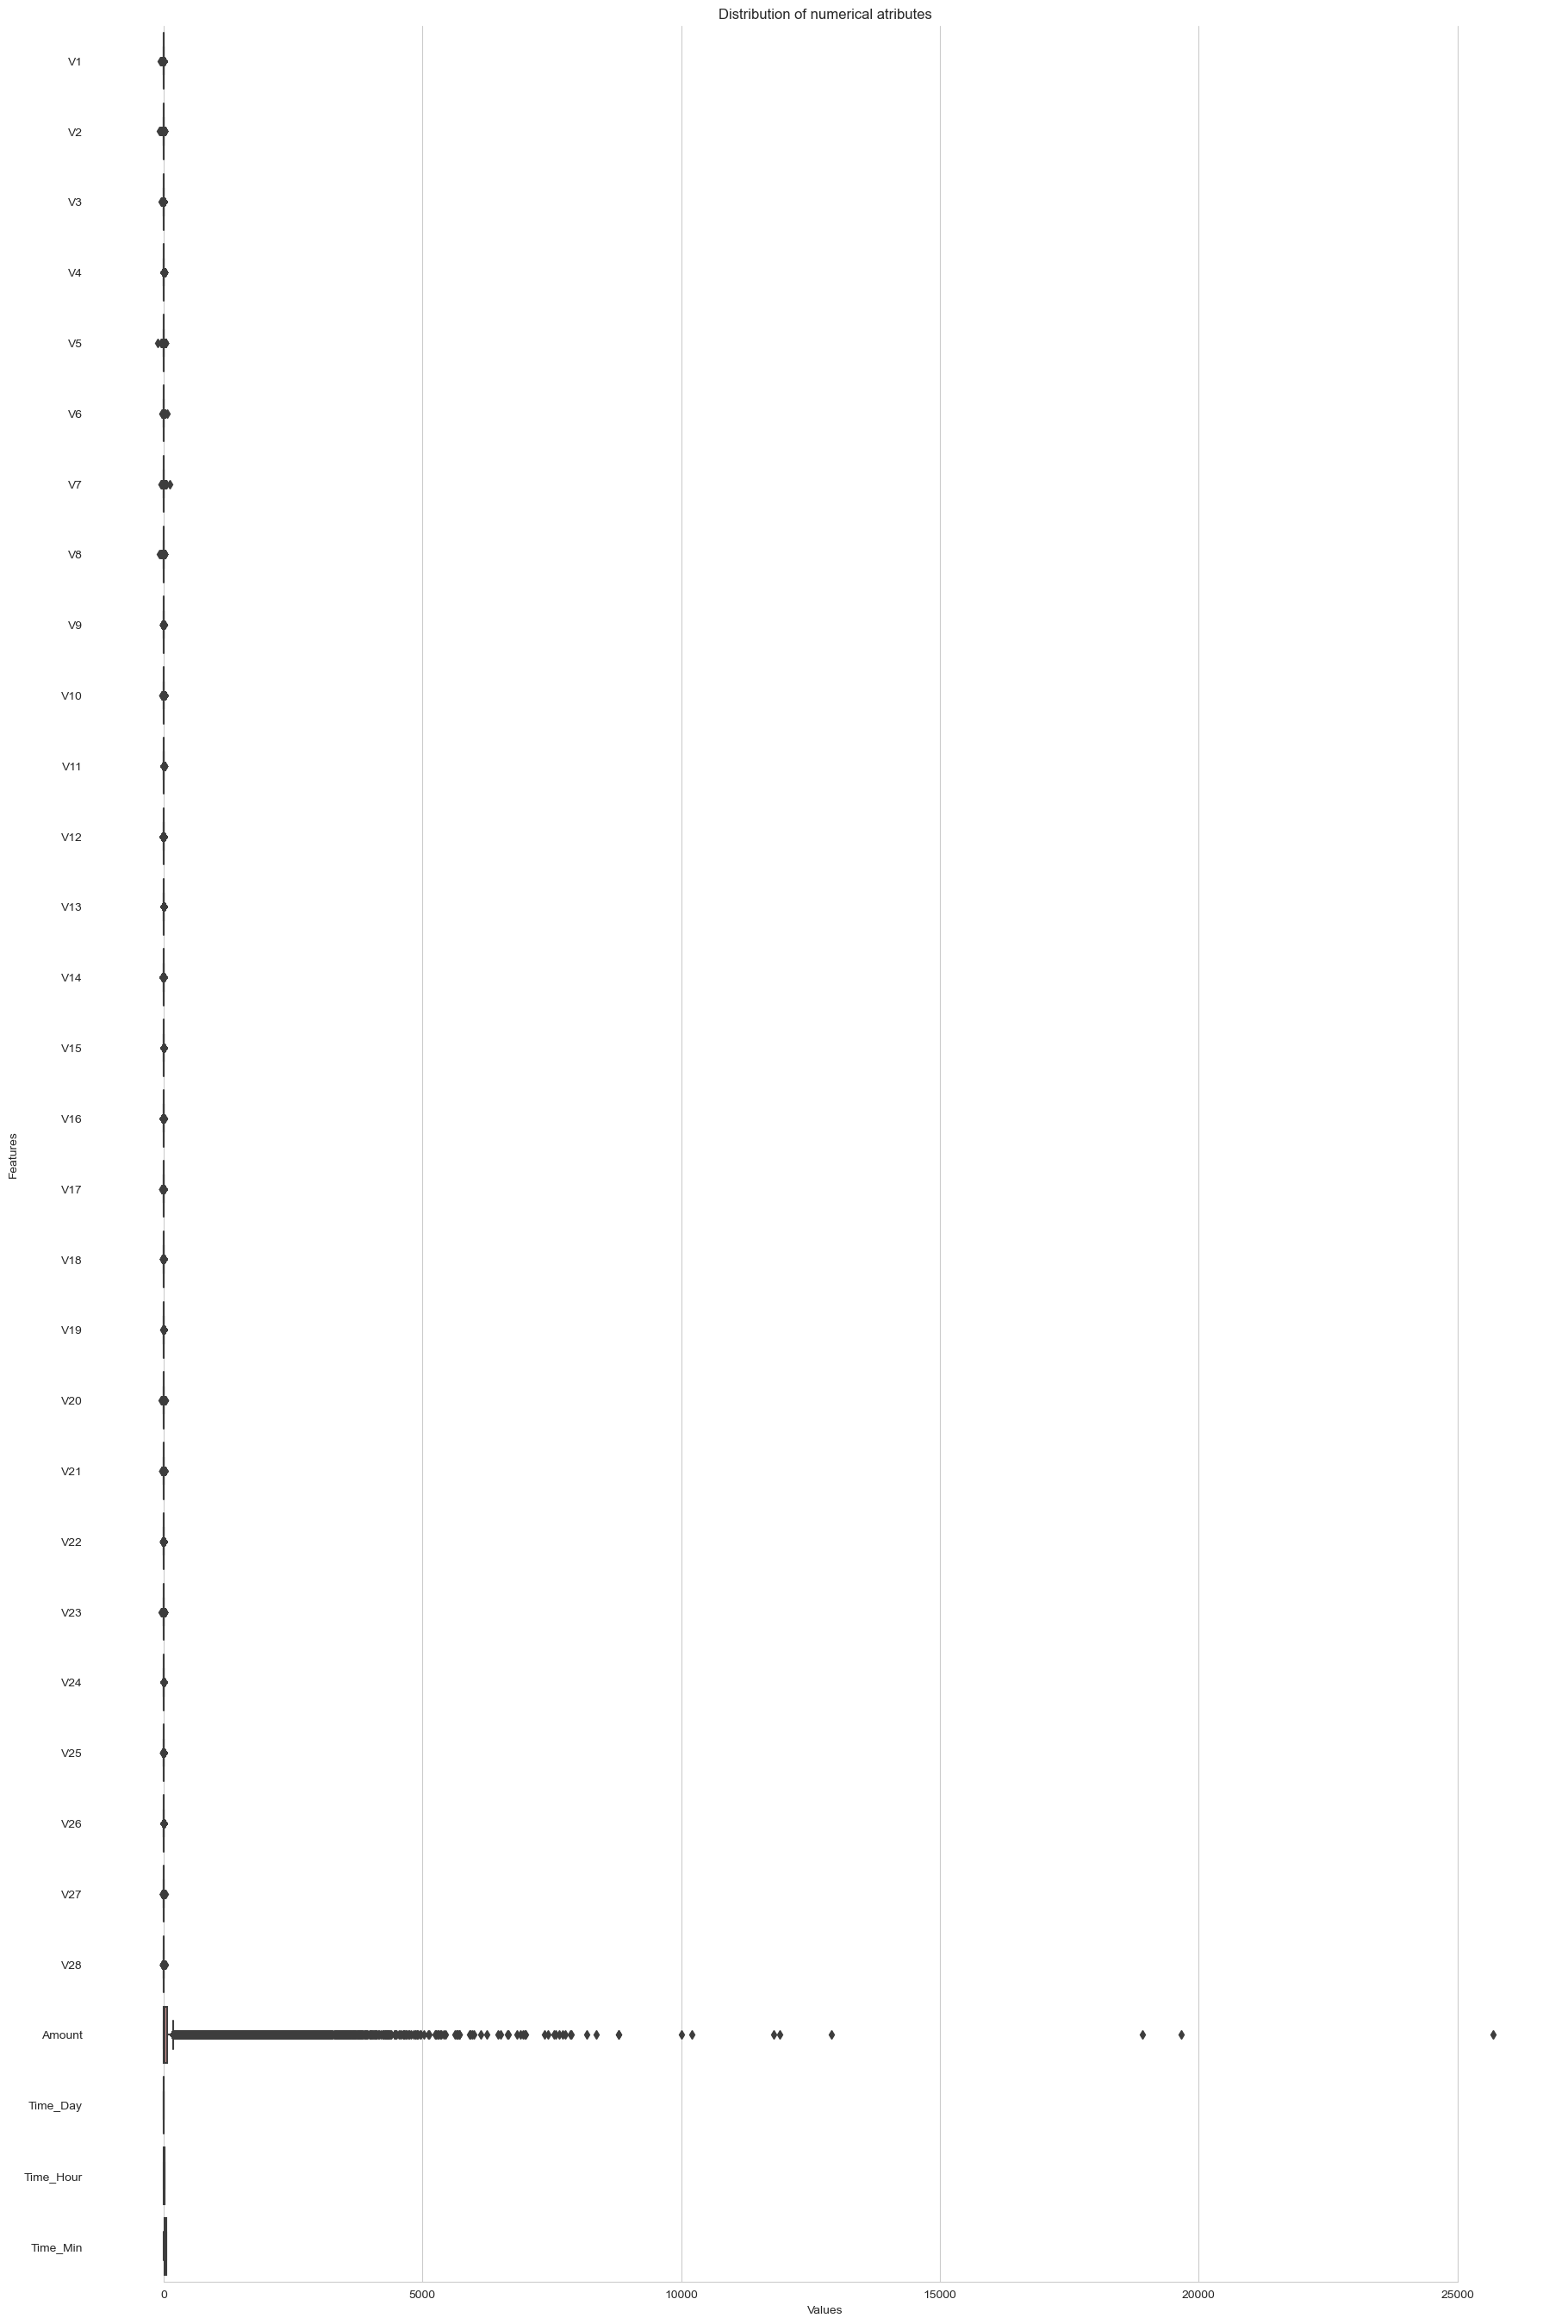

In [27]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

In [28]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

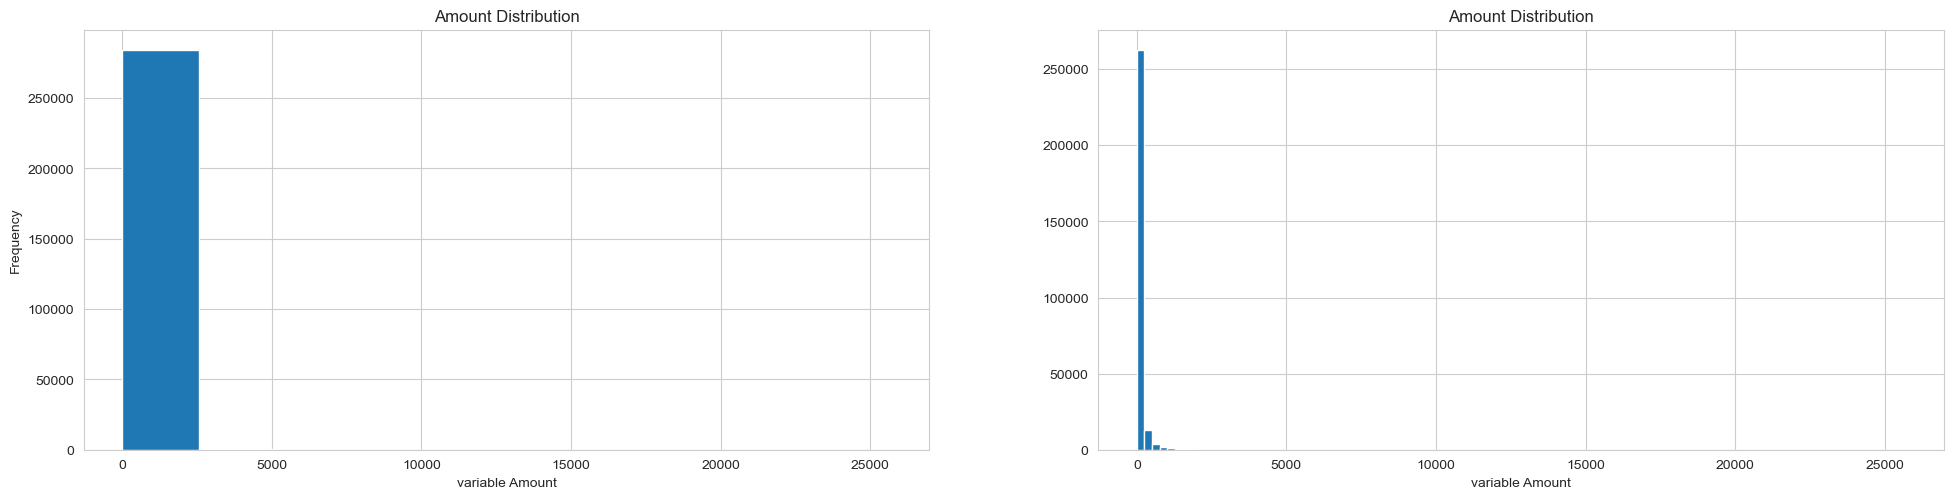

In [29]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()

In [31]:
#Create X and y dataset for independent and dependent data
y= df['Class']
X = df.drop(['Class'], axis=1)

In [32]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [34]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [35]:
cols = list(X.columns.values)

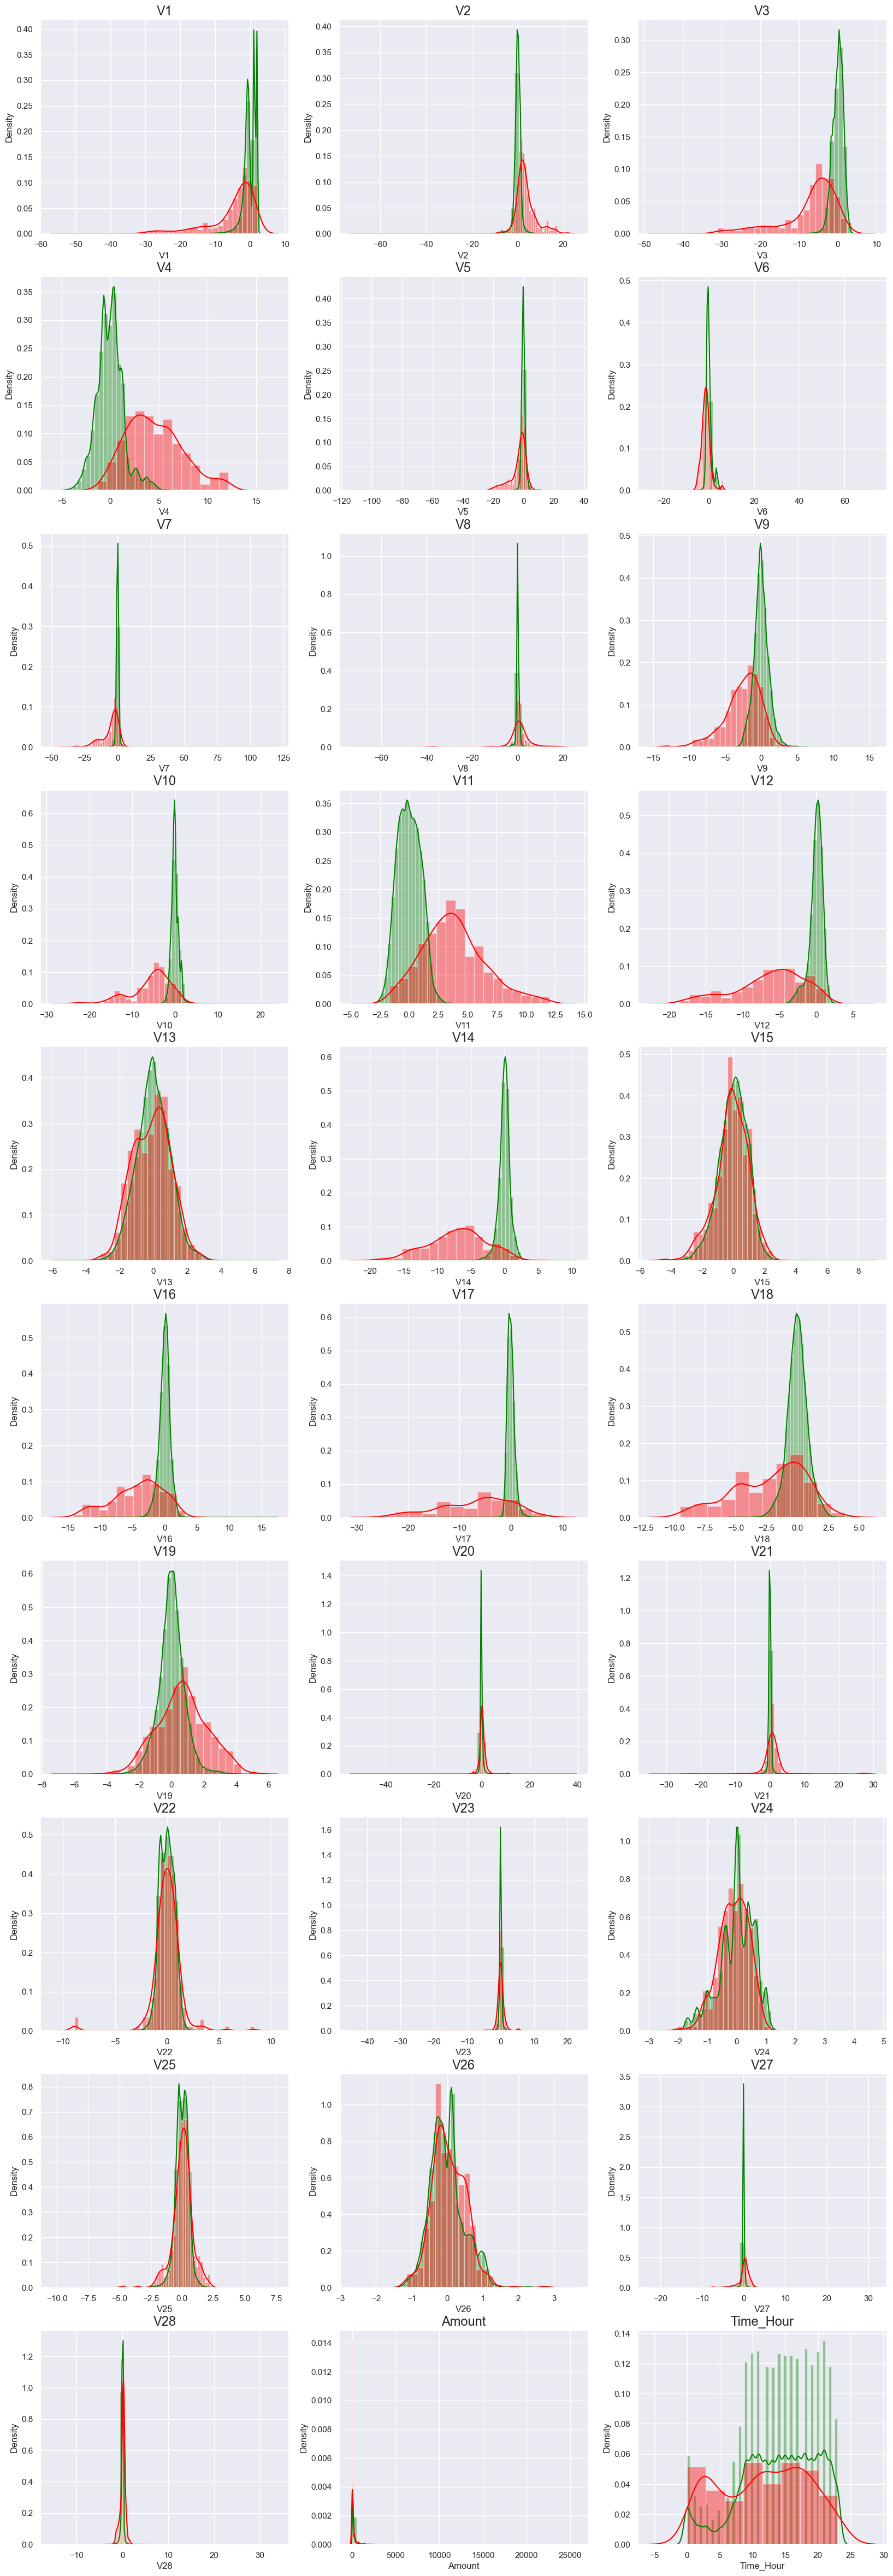

In [36]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, roc_curve
import matplotlib.pyplot as plt

In [38]:
# Print the distribution of the target variable to verify the split
print("Total fraudulent transactions in dataset:", np.sum(y))
print("Total fraudulent transactions in training set:", np.sum(y_train))
print("Total fraudulent transactions in testing set:", np.sum(y_test))

Total fraudulent transactions in dataset: 492
Total fraudulent transactions in training set: 396
Total fraudulent transactions in testing set: 96


In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
#Predection on the unbalanced dataset.
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [42]:
dt = DecisionTreeClassifier(random_state=100)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=100)

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=100)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=100)

In [45]:
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [46]:
# Logistic Regression
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

# Decision Tree
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

# Gradient Boosting
y_train_pred_gb = gb.predict(X_train)
y_test_pred_gb = gb.predict(X_test)

# Naive Bayes
y_train_pred_nb = nb.predict(X_train)
y_test_pred_nb = nb.predict(X_test)


In [47]:
models = {
    "Logistic Regression": (y_train_pred_lr, y_test_pred_lr),
    "Decision Tree": (y_train_pred_dt, y_test_pred_dt),
    "Gradient Boosting": (y_train_pred_gb, y_test_pred_gb),
    "Naive Bayes": (y_train_pred_nb, y_test_pred_nb)
}

for model_name, (y_train_pred, y_test_pred) in models.items():
    print(f"--- {model_name} ---")
    print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Training F1 Score:", f1_score(y_train, y_train_pred))
    print("Testing F1 Score:", f1_score(y_test, y_test_pred))
    print("Training ROC AUC Score:", roc_auc_score(y_train, y_train_pred))
    print("Testing ROC AUC Score:", roc_auc_score(y_test, y_test_pred))
    print("\n")


--- Logistic Regression ---
Training Accuracy: 0.9993284908600145
Testing Accuracy: 0.9990168884519505
Training F1 Score: 0.7792207792207791
Testing F1 Score: 0.6744186046511628
Training ROC AUC Score: 0.8408497369440262
Testing ROC AUC Score: 0.8019250665306743


--- Decision Tree ---
Training Accuracy: 1.0
Testing Accuracy: 0.9989291106351603
Training F1 Score: 1.0
Testing F1 Score: 0.6965174129353233
Training ROC AUC Score: 1.0
Testing ROC AUC Score: 0.8642755923281632


--- Gradient Boosting ---
Training Accuracy: 0.9995084377537361
Testing Accuracy: 0.9989466661985184
Training F1 Score: 0.8603491271820448
Testing F1 Score: 0.702970297029703
Training ROC AUC Score: 0.9354719646109143
Testing ROC AUC Score: 0.8694839256614967


--- Naive Bayes ---
Training Accuracy: 0.978480984880072
Testing Accuracy: 0.9771251009444893
Training F1 Score: 0.11895777178796046
Testing F1 Score: 0.10569663692518874
Training ROC AUC Score: 0.9072939417077004
Testing ROC AUC Score: 0.8897519680769997




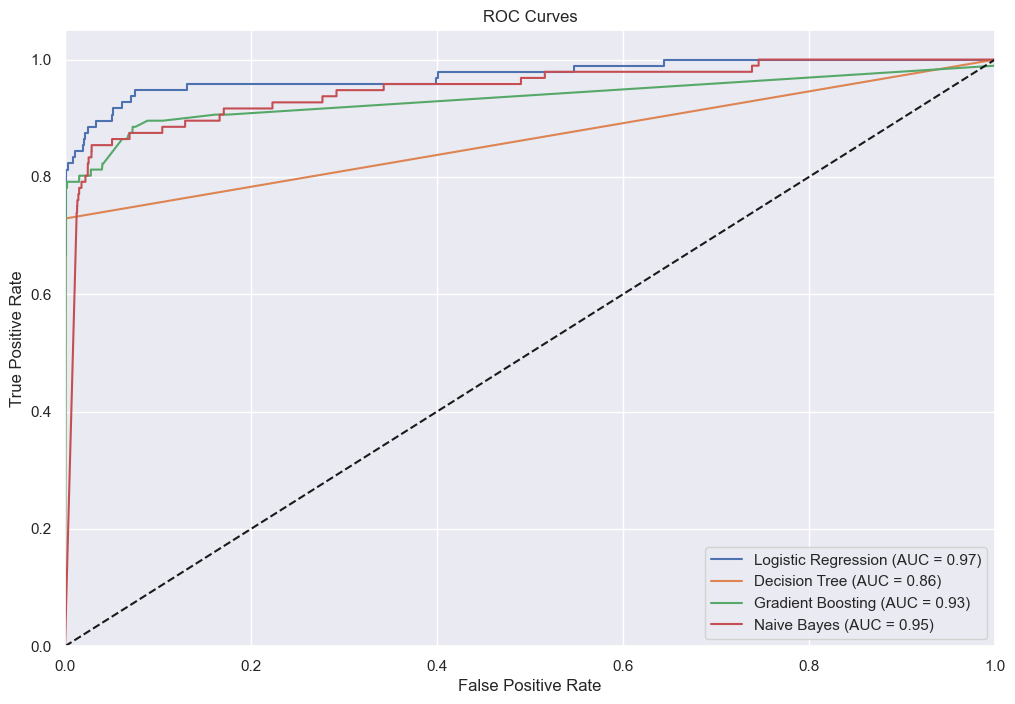

In [48]:
plt.figure(figsize=(12, 8))

for model_name, model in zip(models.keys(), [lr, dt, gb, nb]):
    y_test_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_test_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Pipeline with Cross-Validation Using SMOTE:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

# Define the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=100)),
    ('model', LogisticRegression())
])

# Perform cross-validation (this step is optional, used to evaluate model performance during training)
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print('ROC AUC scores (cross-validation):', scores)

# Train the pipeline on the entire training set
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred_lr = pipeline.predict(X_test)
y_pred_proba_lr = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision_recall_f1 = classification_report(y_test, y_pred_lr, target_names=['Normal', 'Fraud'], digits=4)
roc_auc = roc_auc_score(y_test, y_pred_proba_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", precision_recall_f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


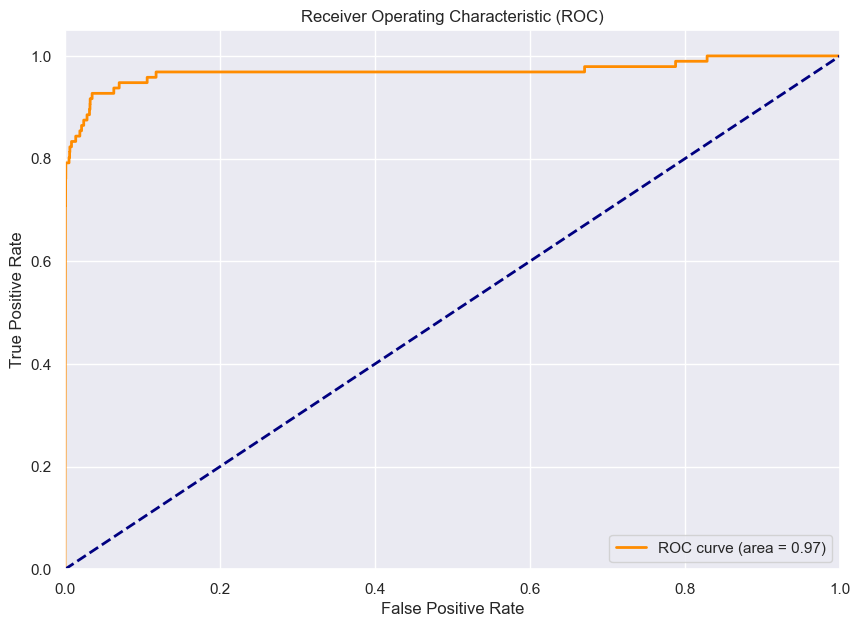

In [53]:
# Calculate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
roc_auc_value = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [54]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

# Define the pipeline with Random Forest instead of Logistic Regression
pipeline = Pipeline([
    ('smote', SMOTE(random_state=100)),
    ('model', RandomForestClassifier(random_state=100))
])

# Perform cross-validation (optional, used to evaluate model performance during training)
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print('ROC AUC scores (cross-validation):', scores)

# Train the pipeline on the entire training set
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = pipeline.predict(X_test)
y_pred_proba_rf = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision_recall_f1 = classification_report(y_test, y_pred_rf, target_names=['Normal', 'Fraud'], digits=4)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", precision_recall_f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


ROC AUC scores (cross-validation): [0.98458529 0.97067376 0.96588108 0.97389091 0.96332863]
Accuracy: 0.9993679997191109

Classification Report:
               precision    recall  f1-score   support

      Normal     0.9996    0.9997    0.9997     56866
       Fraud     0.8261    0.7917    0.8085        96

    accuracy                         0.9994     56962
   macro avg     0.9129    0.8957    0.9041     56962
weighted avg     0.9994    0.9994    0.9994     56962

ROC AUC Score: 0.9813523605200529
Confusion Matrix:
 [[56850    16]
 [   20    76]]


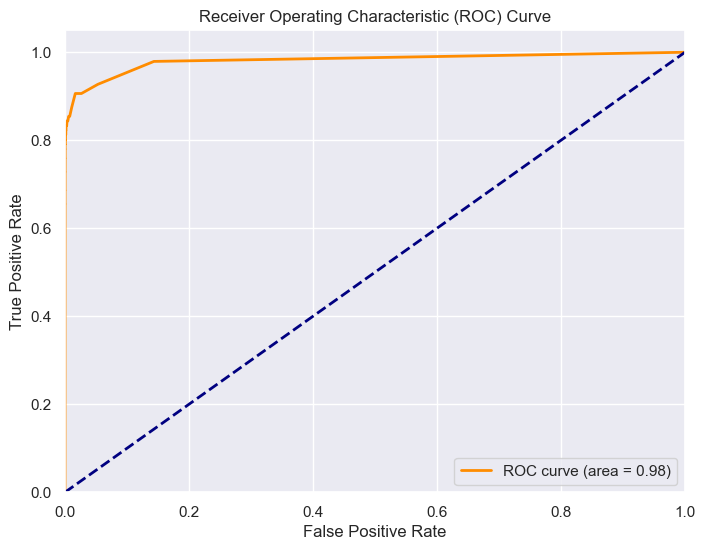

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate ROC curve values: fpr (false positive rate), tpr (true positive rate), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [56]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

# Define the pipeline with Gradient Boosting instead of Random Forest
pipeline = Pipeline([
    ('smote', SMOTE(random_state=100)),
    ('model', GradientBoostingClassifier(random_state=100))
])

# Perform cross-validation (optional, used to evaluate model performance during training)
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print('ROC AUC scores (cross-validation):', scores)

# Train the pipeline on the entire training set
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred_gb = pipeline.predict(X_test)
y_pred_proba_gb = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_gb)
precision_recall_f1 = classification_report(y_test, y_pred_gb, target_names=['Normal', 'Fraud'], digits=4)
roc_auc = roc_auc_score(y_test, y_pred_proba_gb)
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", precision_recall_f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


ROC AUC scores (cross-validation): [0.96837613 0.9844687  0.97354391 0.98270005 0.98547369]
Accuracy: 0.9892033285348126

Classification Report:
               precision    recall  f1-score   support

      Normal     0.9997    0.9894    0.9946     56866
       Fraud     0.1189    0.8438    0.2085        96

    accuracy                         0.9892     56962
   macro avg     0.5593    0.9166    0.6015     56962
weighted avg     0.9982    0.9892    0.9932     56962

ROC AUC Score: 0.9738255284352688
Confusion Matrix:
 [[56266   600]
 [   15    81]]


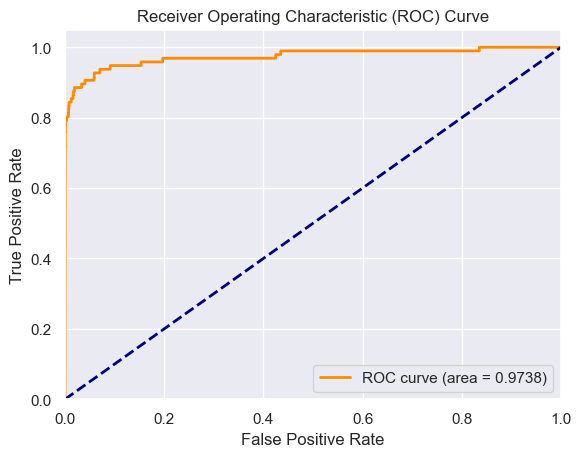

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gb)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [58]:
#Manual SMOTE and Model Evaluation:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=100)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMote
print(y_train_smote.value_counts())

0    227449
1    227449
Name: Class, dtype: int64


In [59]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [60]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

# Predicting on the test set
y_pred_lr = model_lr.predict(X_test)
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision_recall_f1 = classification_report(y_test, y_pred_lr, target_names=['Normal', 'Fraud'], digits=4)
roc_auc = roc_auc_score(y_test, y_pred_proba_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", precision_recall_f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9768266563674028

Classification Report:
               precision    recall  f1-score   support

      Normal     0.9998    0.9770    0.9883     56866
       Fraud     0.0597    0.8646    0.1117        96

    accuracy                         0.9768     56962
   macro avg     0.5297    0.9208    0.5500     56962
weighted avg     0.9982    0.9768    0.9868     56962

ROC AUC Score: 0.9694992943938382
Confusion Matrix:
 [[55559  1307]
 [   13    83]]


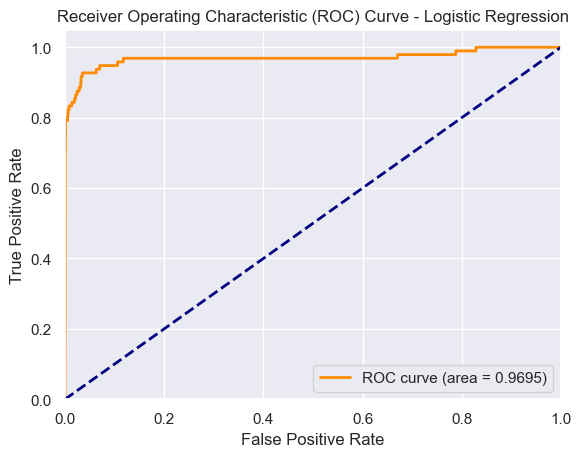

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


In [62]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=100)
model_rf.fit(X_train_smote, y_train_smote)


RandomForestClassifier(random_state=100)

In [63]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

# Predicting on the test set
y_pred_rf = model_rf.predict(X_test)
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision_recall_f1 = classification_report(y_test, y_pred_rf, target_names=['Normal', 'Fraud'], digits=4)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", precision_recall_f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9993679997191109

Classification Report:
               precision    recall  f1-score   support

      Normal     0.9996    0.9997    0.9997     56866
       Fraud     0.8261    0.7917    0.8085        96

    accuracy                         0.9994     56962
   macro avg     0.9129    0.8957    0.9041     56962
weighted avg     0.9994    0.9994    0.9994     56962

ROC AUC Score: 0.9813523605200529
Confusion Matrix:
 [[56850    16]
 [   20    76]]


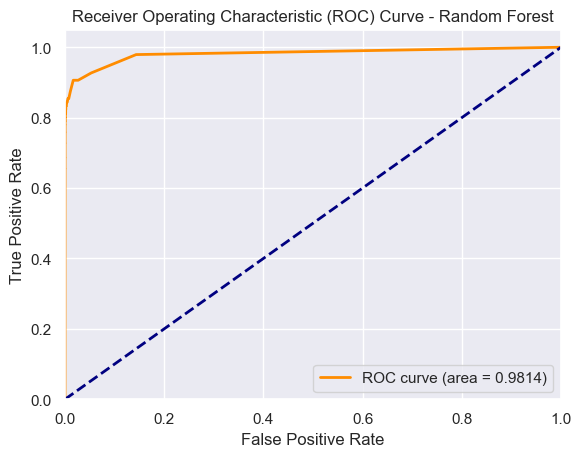

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)  # Use the probability estimates for the positive class
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbm = GradientBoostingClassifier()
model_gbm.fit(X_train_smote, y_train_smote)


GradientBoostingClassifier()

In [66]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

# Predicting on the test set
y_pred_gbm = model_gbm.predict(X_test)
y_pred_proba_gbm = model_gbm.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Calculate metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_recall_f1_gbm = classification_report(y_test, y_pred_gbm, target_names=['Normal', 'Fraud'], digits=4)
roc_auc_gbm = roc_auc_score(y_test, y_pred_proba_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

# Display the results
print("Accuracy:", accuracy_gbm)
print("\nClassification Report:\n", precision_recall_f1_gbm)
print("ROC AUC Score:", roc_auc_gbm)
print("Confusion Matrix:\n", conf_matrix_gbm)


Accuracy: 0.9892033285348126

Classification Report:
               precision    recall  f1-score   support

      Normal     0.9997    0.9894    0.9946     56866
       Fraud     0.1189    0.8438    0.2085        96

    accuracy                         0.9892     56962
   macro avg     0.5593    0.9166    0.6015     56962
weighted avg     0.9982    0.9892    0.9932     56962

ROC AUC Score: 0.9738255284352688
Confusion Matrix:
 [[56266   600]
 [   15    81]]


In [67]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
# Predicting on the test set with XGBoost model
y_pred_xgb = model_xgb.predict(X_test)
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_recall_f1_xgb = classification_report(y_test, y_pred_xgb, target_names=['Normal', 'Fraud'], digits=4)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display the results
print("Accuracy:", accuracy_xgb)
print("\nClassification Report:\n", precision_recall_f1_xgb)
print("ROC AUC Score:", roc_auc_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)


Accuracy: 0.9989993328885924

Classification Report:
               precision    recall  f1-score   support

      Normal     0.9996    0.9994    0.9995     56866
       Fraud     0.6757    0.7812    0.7246        96

    accuracy                         0.9990     56962
   macro avg     0.8377    0.8903    0.8621     56962
weighted avg     0.9991    0.9990    0.9990     56962

ROC AUC Score: 0.9633363228173836
Confusion Matrix:
 [[56830    36]
 [   21    75]]


In [69]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


In [70]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [71]:
# Initialize the XGBClassifier
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=100)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)


In [73]:
# Fit GridSearchCV
grid_search_xgb.fit(X_train_smote, y_train_smote)

# Best parameters and best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Score:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Best Score: 0.9998241693025633


In [74]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

# Use the best estimator from the GridSearchCV
best_xgb = grid_search_xgb.best_estimator_

# Predicting on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision_recall_f1 = classification_report(y_test, y_pred_xgb, target_names=['Normal', 'Fraud'], digits=4)
roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", precision_recall_f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9991924440855307

Classification Report:
               precision    recall  f1-score   support

      Normal     0.9996    0.9995    0.9996     56866
       Fraud     0.7451    0.7917    0.7677        96

    accuracy                         0.9992     56962
   macro avg     0.8724    0.8956    0.8836     56962
weighted avg     0.9992    0.9992    0.9992     56962

ROC AUC Score: 0.9660233780583594
Confusion Matrix:
 [[56840    26]
 [   20    76]]


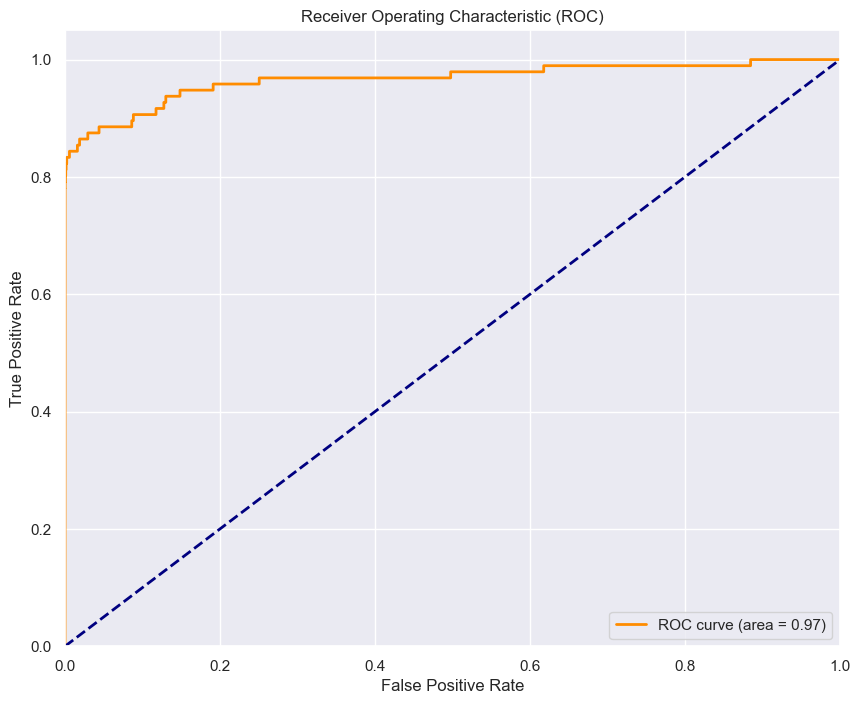

In [88]:
# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

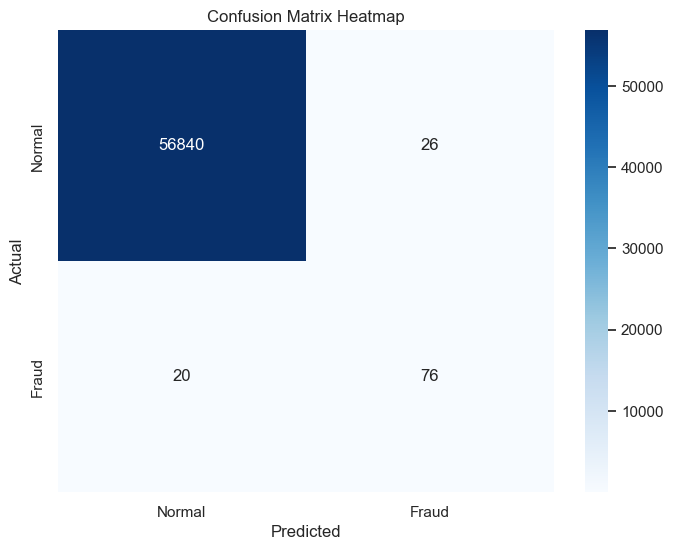

In [75]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

conclusion:
The Credit Card Fraud Detection model achieved a high accuracy of 99.92%, 
indicating excellent performance in classifying transactions. 
The ROC AUC score of 0.9660 reflects strong capability in distinguishing between fraudulent and non-fraudulent transactions. 
The classification report shows high precision and recall for normal transactions, 
but somewhat lower performance for fraudulent ones, with a precision of 0.7451 and recall of 0.7917. 
This suggests the model is effective for detecting non-fraudulent transactions but could benefit from further
tuning to improve its detection of fraudulent transactions. Overall,
the model demonstrates robust performance with some room for enhancement.







